### 1. Load and Inspect dataset

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
import os
from wordcloud import WordCloud

In [2]:
project_root = os.path.abspath(os.path.join(os.path.dirname(''), '..'))
nltk_data_path = os.path.join(project_root, 'nltk_data')
nltk.data.path = [nltk_data_path] 
nltk.download('punkt_tab', download_dir=nltk_data_path)

np.random.seed(42)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     c:\Users\quadr\Documents\spam_filter_project\nltk_data
[nltk_data]     ...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


In [3]:
# Load dataset
data_path = os.path.join('..', 'data', 'raw', 'SMSSpamCollection.csv')
df = pd.read_csv(data_path, sep='\t', encoding='utf-8', names=['label', 'message'], header=None)

In [4]:
# Display dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
# Display first few rows of the dataset
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.shape

(5572, 2)

### 2. Missing Values and Data Quality

In [7]:
# Check for missing values
df.isnull().sum()

label      0
message    0
dtype: int64

In [8]:
# Check for duplicates
df.duplicated().sum()

np.int64(403)

In [9]:
# Remove duplicates
if df.duplicated().sum() > 0:
    df = df.drop_duplicates().reset_index(drop=True)
df.shape

(5169, 2)

In [10]:
# Count ham and spam messages after duplicate removal
label_counts = df['label'].value_counts()
print("Label Counts after Duplicate Removal:\n", label_counts)

Label Counts after Duplicate Removal:
 label
ham     4516
spam     653
Name: count, dtype: int64


In [11]:
# Add message length as a feature
df['message_length'] = df['message'].apply(len)

### 3. EDA

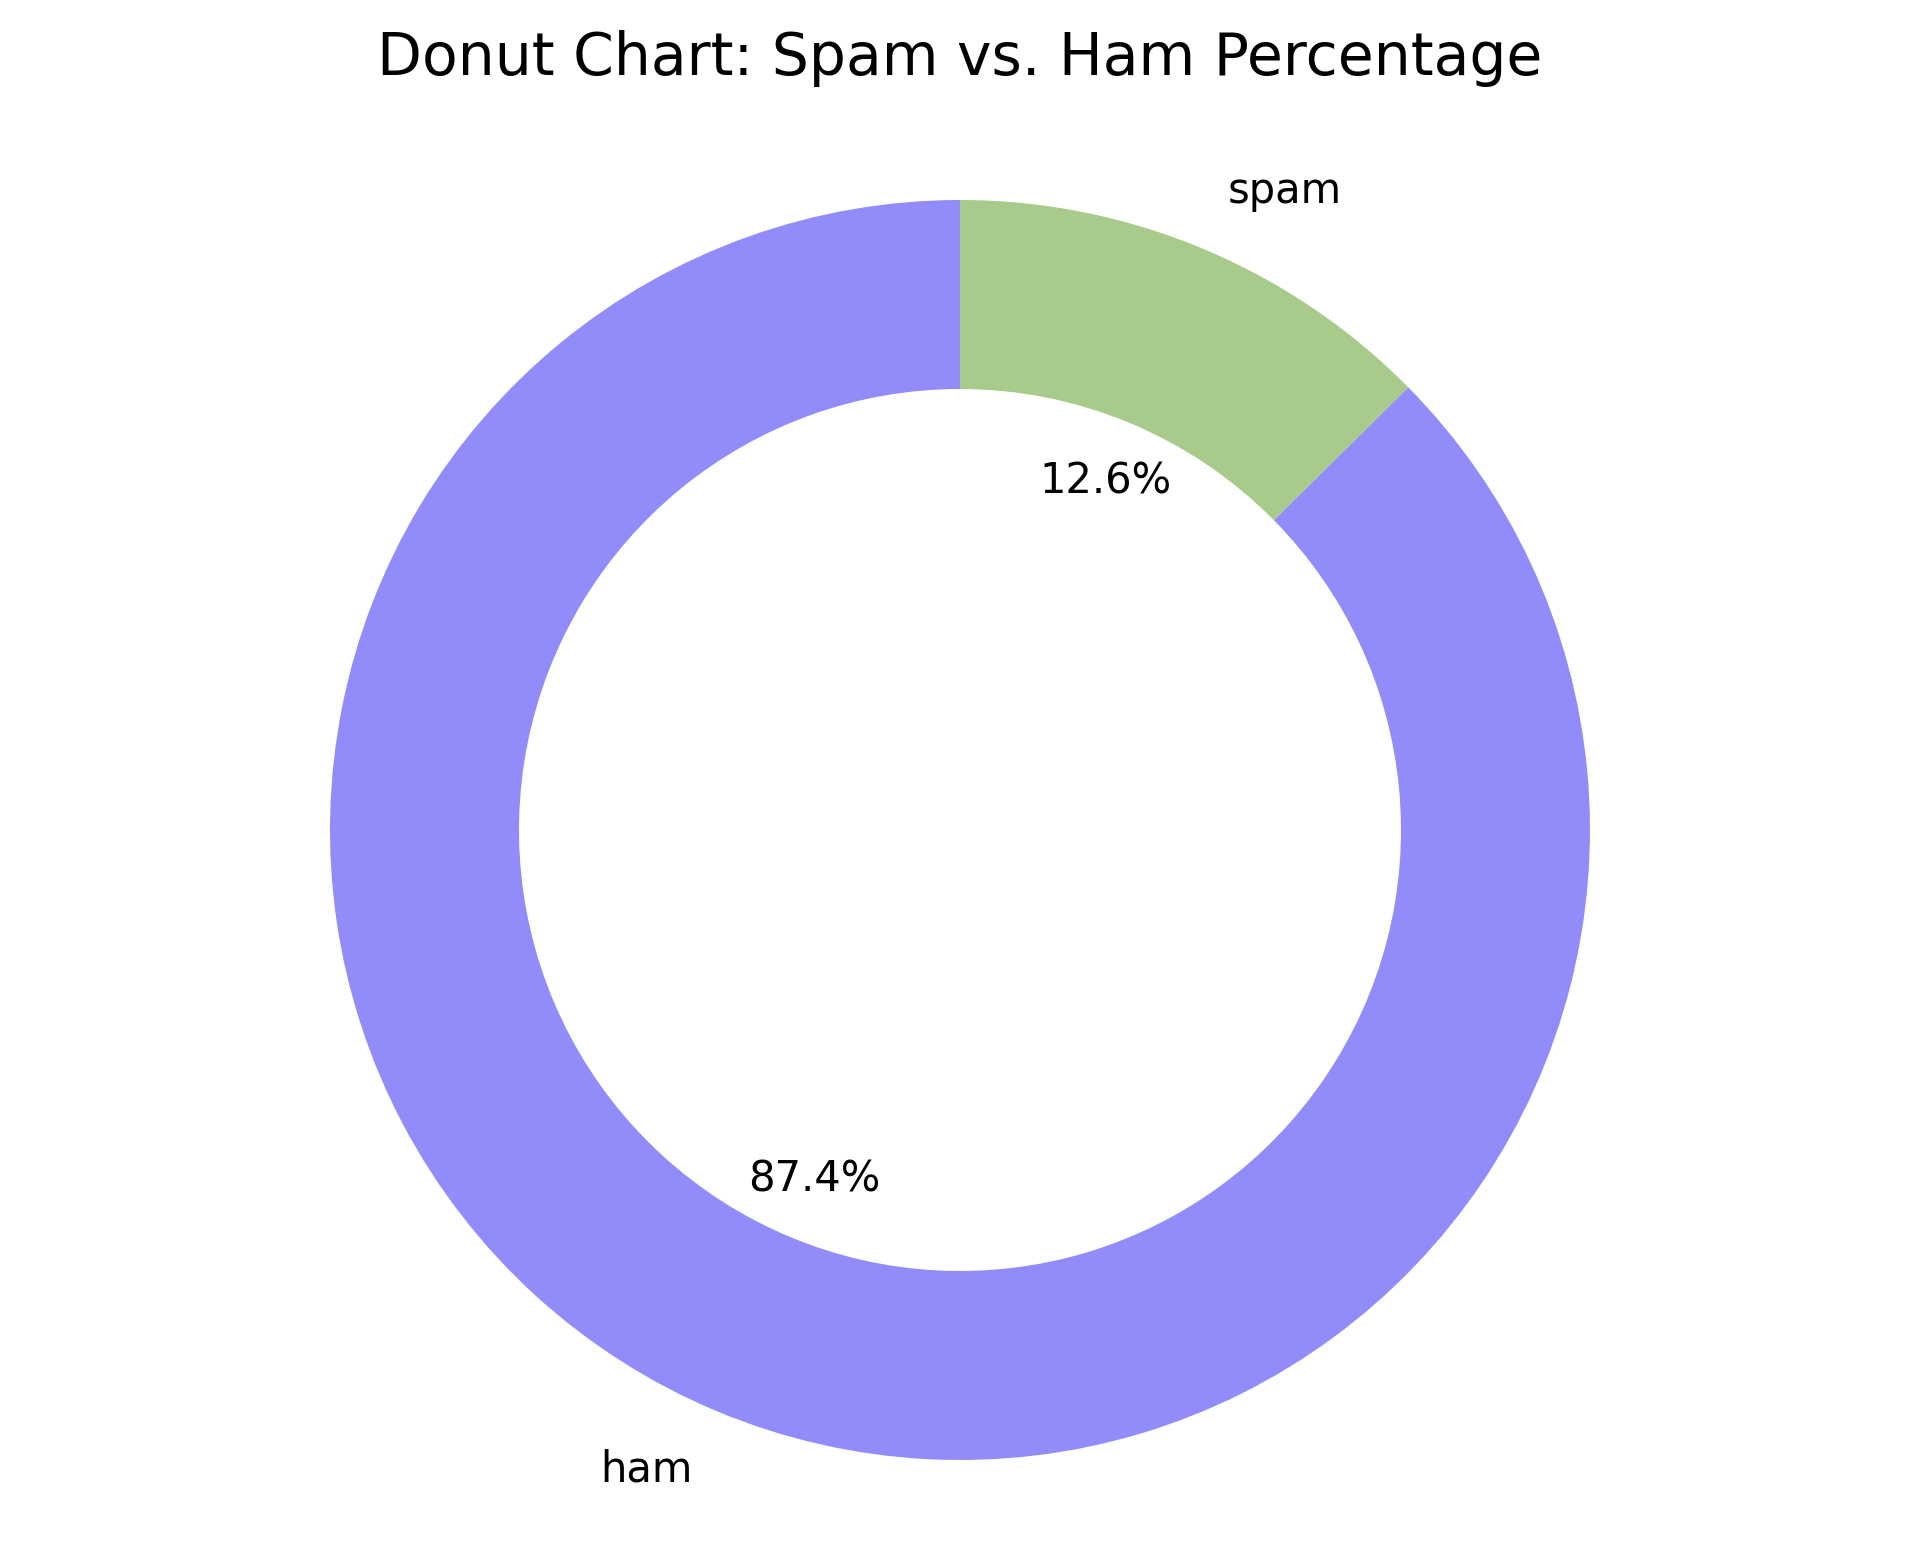

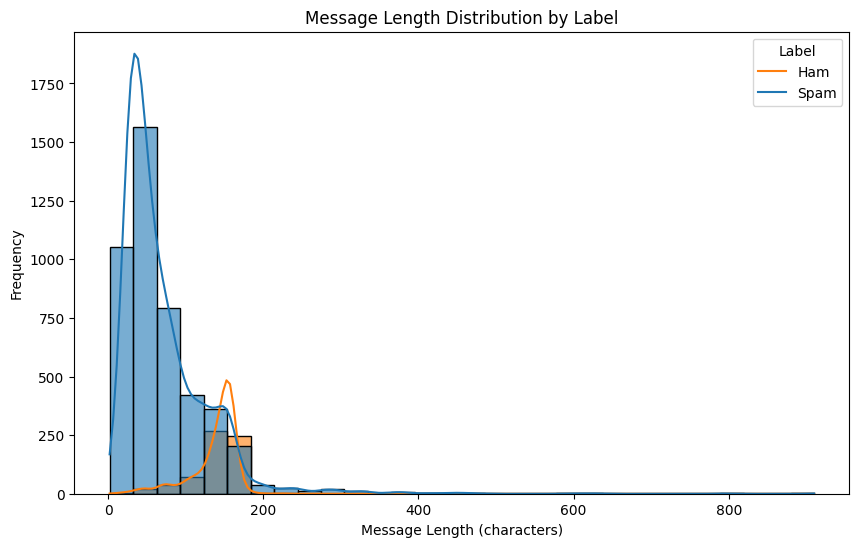

In [12]:
# Donut chart
label_dist = df['label'].value_counts()
total = label_dist.sum()
percentages = (label_dist / total * 100).round(1)
plt.figure(figsize=(8, 6), dpi=300)
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', colors=["#918cfa", "#A8CA8A"], startangle=90, wedgeprops=dict(width=0.3))
plt.title('Donut Chart: Spam vs. Ham Percentage', pad=15, size=14)
plt.axis('equal')
plt.savefig(os.path.join('..', 'reports', 'label_percentage_donut.png'), dpi=300, bbox_inches='tight')
plt.show()

# Plot message length distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='message_length', hue='label', kde=True, palette='tab10', bins=30, alpha=0.6)
plt.title('Message Length Distribution by Label')
plt.xlabel('Message Length (characters)')
plt.ylabel('Frequency')
plt.legend(title='Label', labels=['Ham', 'Spam'])
plt.savefig(os.path.join('..', 'reports', 'message_length_distribution.png'), dpi=300)
plt.show()

### 4. Text Processing

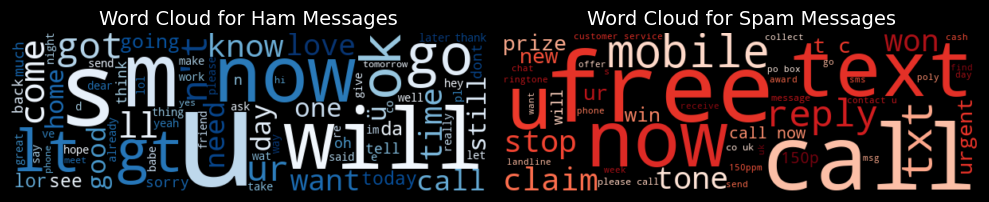

In [13]:
ham_words = ""
spam_words = ""

for value in df[df['label'] == 'ham']['message']:
    lowercase_text = value.lower()
    tokens = nltk.word_tokenize(lowercase_text)
    for word in tokens:
        ham_words = ham_words + word + ' '

for value in df[df['label'] == 'spam']['message']:
    lowercase_text = value.lower()
    tokens = nltk.word_tokenize(lowercase_text)
    for word in tokens:
        spam_words = spam_words + word + ' '

ham_wordcloud = WordCloud(background_color="black", width=600, height=200, colormap='Blues', min_font_size=10).generate(ham_words)
spam_wordcloud = WordCloud(background_color="black", width=600, height=200, colormap='Reds', min_font_size=10).generate(spam_words)

plt.figure(figsize=(10, 5), facecolor='black')
plt.subplot(1, 2, 1)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Ham Messages', size=14, color='white')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Spam Messages', size=14, color='white')
plt.axis("off")

plt.tight_layout()
plt.savefig(os.path.join('..', 'reports', 'wordclouds_ham_spam.png'), dpi=300, transparent=False, bbox_inches='tight', pad_inches=0.1)
plt.show()